C:\Users\DELL\AppData\Local\Temp\ipykernel_12424\699286138.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.0434
Epoch 2/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0017
Epoch 3/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0015
Epoch 4/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0014
Epoch 5/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0013
Epoch 6/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0014
Epoch 7/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0012
Epoch 8/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0013
Epoch 9/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0015
Epoch 10/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0014
Epoch 11/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0012
Epoch 12/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0013
Epoch 13/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0016
Epoch 14/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0012
Epoch 15/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0012
Epoc

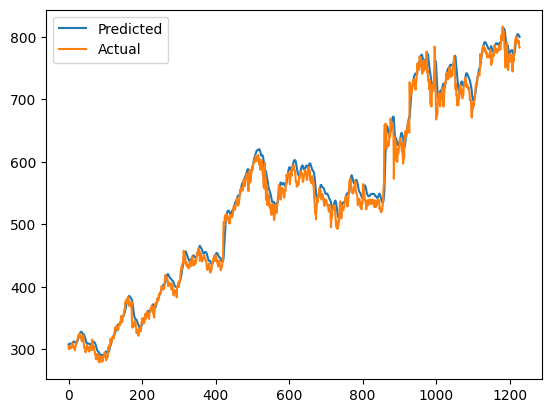

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Next day predicted value: [[797.97894]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Next 10 days predicted values:
[[797.97893946]
 [798.4048294 ]
 [799.74856792]
 [801.60618116]
 [803.73845047]
 [805.99548773]
 [808.28306012]
 [810.54294903]
 [812.74109479]
 [814.85808052]]


In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential


df = pd.read_csv(r"C:\Users\DELL\Downloads\Google_Stock_Price_Train.csv")


df = df.fillna(method='ffill')


x = df["Open"]
x = np.array(x).reshape((len(x), 1))  


scaler_x = MinMaxScaler(feature_range=(0, 1))
x_scaled = scaler_x.fit_transform(x)

x_stock = []
y_stock = []


for i in range(30, len(x_scaled)):
    x_stock.append(x_scaled[i-30:i])
    y_stock.append(x_scaled[i])

x_stock = np.array(x_stock)
y_stock = np.array(y_stock)

lstm = Sequential()
lstm.add(LSTM(units=50, input_shape=(x_stock.shape[1], x_stock.shape[2]), return_sequences=True))
lstm.add(Dropout(0.2))
lstm.add(LSTM(units=20, return_sequences=False))
lstm.add(Dense(units=1))  # No activation for regression

lstm.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, clipnorm=1.0), loss="mean_squared_error")


history = lstm.fit(x_stock, y_stock, batch_size=20, epochs=30)


print(history.history['loss'])


y_pred = lstm.predict(x_stock)


y_pred_inversed = scaler_x.inverse_transform(y_pred)
y_stock_inversed = scaler_x.inverse_transform(y_stock.reshape(-1, 1))


plt.plot(y_pred_inversed, label="Predicted")
plt.plot(y_stock_inversed, label="Actual")
plt.legend()
plt.show()


last_30_days = x_scaled[-30:]  # Get the last 30 days of scaled data
last_30_days = np.reshape(last_30_days, (1, 30, 1))

next_day_prediction = lstm.predict(last_30_days)
next_day_prediction_inversed = scaler_x.inverse_transform(next_day_prediction)
print(f"Next day predicted value: {next_day_prediction_inversed}")


predicted = np.array([])
for i in range(10): 
    last_30_days = x_scaled[-30:] 
    next_day = lstm.predict(np.reshape(last_30_days, (1, 30, 1)))  
    
   
    predicted = np.append(predicted, next_day)  
    
    
    x_scaled = np.append(x_scaled, next_day).reshape(-1, 1)


predicted = scaler_x.inverse_transform(np.reshape(predicted, (10, 1)))


print("Next 10 days predicted values:")
print(predicted)